# figs_d25a.ipynb
Analyse high-end and low-end projections and produce figures.

Author: Benjamin S. Grandey.

In [1]:
import d25a
import datetime

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Print package versions
print(d25a.get_watermark())

Python implementation: CPython
Python version       : 3.10.16
IPython version      : 8.31.0

matplotlib: 3.10.0
numpy     : 2.2.1
pandas    : 2.2.3
seaborn   : 0.13.2
xarray    : 2025.1.1

conda environment: d25a-rsl-fusion

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



Written fig01.pdf (0.02 MB)
Written fig01.png (0.19 MB)


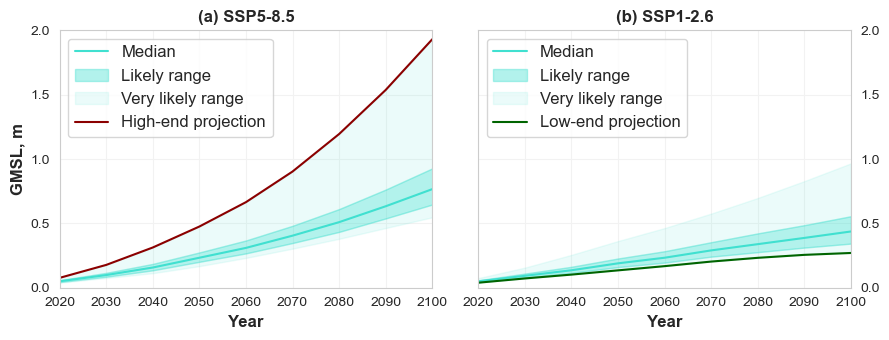

In [4]:
# Plot time series of GMSL
fig, axs = d25a.fig_fusion_timeseries(gauge_city=None, gmsl_rsl_novlm='gmsl')
_ = d25a.name_save_fig(fig, fso='f')

In [5]:
# Get high-end and low-end projections and show summary statistics
proj_df = d25a.get_info_high_low_exceed_df(rsl_novlm='rsl', cities=False)
proj_df.describe()

,lat,lon,high,low,central,p_ex_high_ssp585,p_ex_high_ssp126,p_ex_low_ssp585,p_ex_low_ssp126,p_ex_central_ssp585,p_ex_central_ssp126
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1.016000e+03,1016.000000,1016.000000,1.016000e+03,1016.000000,1016.000000
mean,30.538543,29.344902,1.947700,0.137711,0.536375,5.000000e-02,0.001153,0.993100,9.500000e-01,0.863275,0.234806
std,30.716980,94.763899,0.370585,0.300973,0.282192,6.942311e-18,0.001635,0.010583,2.221540e-16,0.059910,0.047520
min,-65.250000,-179.370000,-0.095559,-1.861529,-1.456000,5.000000e-02,0.000000,0.851400,9.500000e-01,0.365500,0.138600
25%,16.830000,-57.980000,1.803949,0.077978,0.471000,5.000000e-02,0.000700,0.993400,9.500000e-01,0.837175,0.205750
50%,36.960000,18.740000,1.999809,0.174574,0.567000,5.000000e-02,0.000900,0.995100,9.500000e-01,0.865100,0.229200
75%,52.965000,126.545000,2.164632,0.259294,0.643625,5.000000e-02,0.001400,0.995700,9.500000e-01,0.899000,0.253850
max,80.620000,179.220000,3.969382,1.955471,2.357000,5.000000e-02,0.031500,0.998500,9.500000e-01,0.953800,0.604500


In [6]:
# Table summarising some of the key results across cities
d25a.get_summary_df(cities=True)

Of 37 cities, 16 are within 100 km of a tide gauge.


,low,central,high
GMSL,0.3 m,0.6 m,1.9 m
RSL median,0.2 m,0.5 m,2.0 m
RSL IQR,0.1 to 0.3 m,0.5 to 0.7 m,1.9 to 2.2 m
RSL range,-0.3 to 1.3 m,0.0 to 1.7 m,1.5 to 3.2 m
P(RSL > projection | SSP5-8.5) median,99.6 %,90.2 %,5.0 %
P(RSL > projection | SSP5-8.5) IQR,99.5 to 99.6 %,89.0 to 91.7 %,5.0 to 5.0 %
P(RSL > projection | SSP5-8.5) range,99.2 to 99.7 %,87.3 to 93.5 %,5.0 to 5.0 %
P(RSL > projection | SSP1-2.6) median,95.0 %,20.8 %,0.1 %
P(RSL > projection | SSP1-2.6) IQR,95.0 to 95.0 %,20.0 to 22.8 %,0.1 to 0.1 %
P(RSL > projection | SSP1-2.6) range,95.0 to 95.0 %,16.8 to 29.2 %,0.1 to 0.2 %


In [7]:
# Table summarising some of the key results across tide gauges
d25a.get_summary_df(cities=False)

,low,central,high
GMSL,0.3 m,0.6 m,1.9 m
RSL median,0.2 m,0.6 m,2.0 m
RSL IQR,0.1 to 0.3 m,0.5 to 0.6 m,1.8 to 2.2 m
RSL range,-1.9 to 2.0 m,-1.5 to 2.4 m,-0.1 to 4.0 m
P(RSL > projection | SSP5-8.5) median,99.5 %,86.5 %,5.0 %
P(RSL > projection | SSP5-8.5) IQR,99.3 to 99.6 %,83.7 to 89.9 %,5.0 to 5.0 %
P(RSL > projection | SSP5-8.5) range,85.1 to 99.9 %,36.5 to 95.4 %,5.0 to 5.0 %
P(RSL > projection | SSP1-2.6) median,95.0 %,22.9 %,0.1 %
P(RSL > projection | SSP1-2.6) IQR,95.0 to 95.0 %,20.6 to 25.4 %,0.1 to 0.1 %
P(RSL > projection | SSP1-2.6) range,95.0 to 95.0 %,13.9 to 60.5 %,0.0 to 3.1 %


Plotting projection for 1016 locations.
Written s01.pdf (0.08 MB)
Written s01.png (0.30 MB)


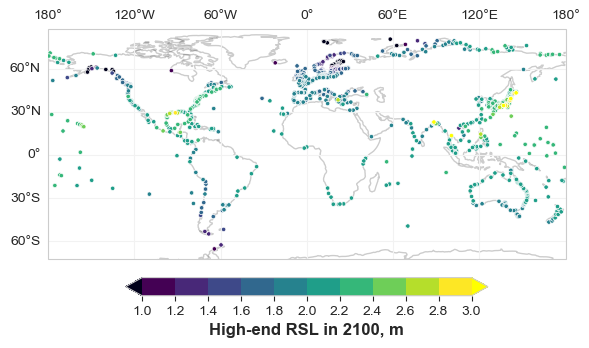

In [8]:
# Plot map showing high-end projection at all gauges
fig, ax = d25a.fig_high_map(high_low='high', cities=False)
_ = d25a.name_save_fig(fig, fso='s')

Plotting 22 city locations.
Plotting projection for 11 locations.
Written fig02.pdf (0.04 MB)
Written fig02.png (0.18 MB)


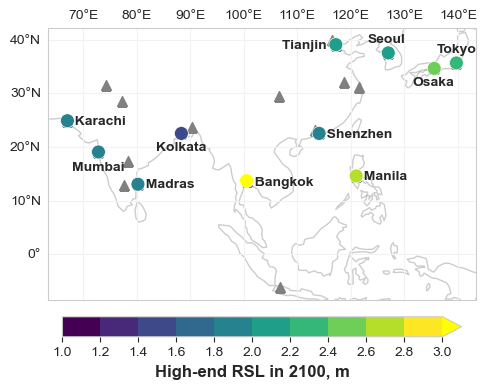

In [9]:
# Plot map for cities in Asia
fig, ax = d25a.fig_high_map(high_low='high', cities=True, region='asia')
_ = d25a.name_save_fig(fig, fso='f')

Of 37 cities, 16 are within 100 km of a tide gauge.
Written fig03.pdf (0.03 MB)
Written fig03.png (0.17 MB)


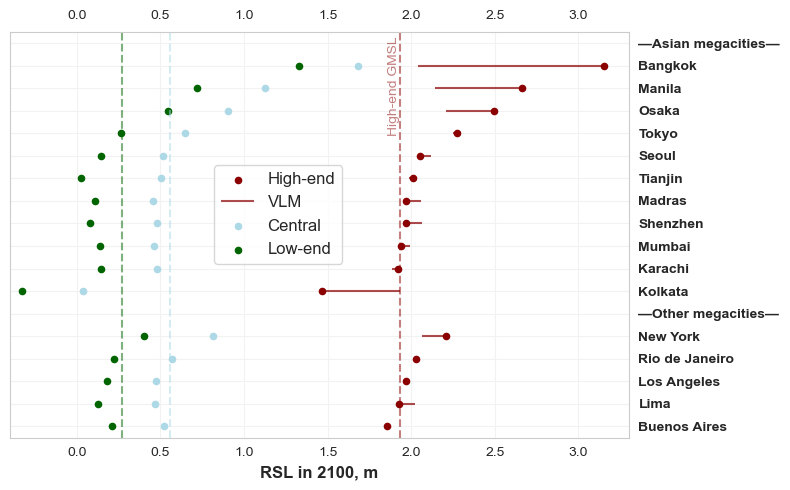

In [10]:
# Plot projections for large cities
fig, ax = d25a.fig_city_proj()
_ = d25a.name_save_fig(fig, fso='f')

Written s02.pdf (0.02 MB)
Written s02.png (0.23 MB)
Written s03.pdf (0.03 MB)
Written s03.png (0.18 MB)


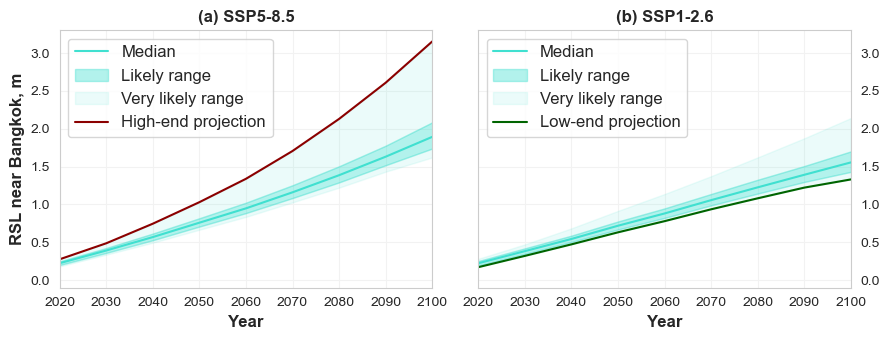

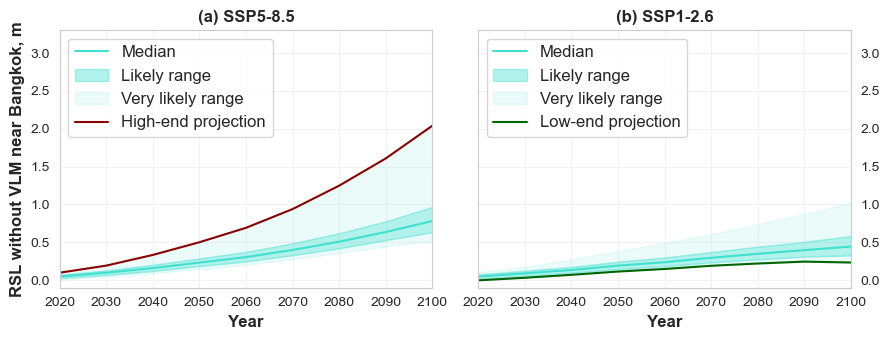

In [11]:
# Plot time series for Bangkok
for rsl_novlm in ['rsl', 'novlm']:
    fig, axs = d25a.fig_fusion_timeseries(gauge_city='Bangkok', gmsl_rsl_novlm=rsl_novlm)
    axs[0].set_ylim([-0.1, 3.3])
    _ = d25a.name_save_fig(fig, fso='s')

Plotting 15 city locations.
Plotting projection for 5 locations.
Written fig04.pdf (0.05 MB)
Written fig04.png (0.18 MB)


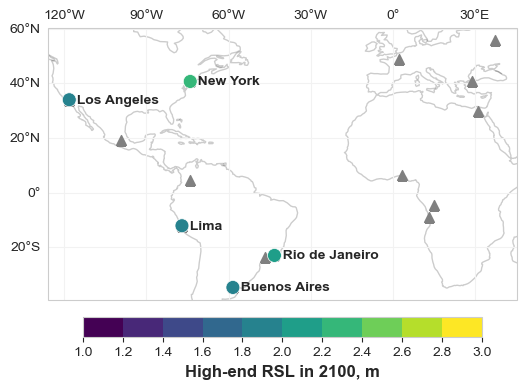

In [12]:
# Plot map for cities in other regions
fig, ax = d25a.fig_high_map(high_low='high', cities=True, region='other')
_ = d25a.name_save_fig(fig, fso='f')

In [13]:
# Identify locations with min and max projections
rsl_df = d25a.get_info_high_low_exceed_df(rsl_novlm='rsl')  # RSL projections
novlm_df = d25a.get_info_high_low_exceed_df(rsl_novlm='novlm')  # RSL without VLM
for high_low in ['high', 'low', 'central']:
    for min_max, idx in [('min', rsl_df[high_low].idxmin()), ('max', rsl_df[high_low].idxmax())]:
        print(f'{rsl_df["gauge_name"].loc[idx]} ({rsl_df["country"].loc[idx]}) has {min_max} {high_low} projection '
              f'of {rsl_df[high_low].loc[idx]:.1f} m ({novlm_df[high_low].loc[idx]:.1f} m excluding VLM)')

SKAGWAY (UNITED STATES) has min high projection of -0.1 m (1.8 m excluding VLM)
TOBA (JAPAN) has max high projection of 4.0 m (2.2 m excluding VLM)
KOZU_SIMA (JAPAN) has min low projection of -1.9 m (0.2 m excluding VLM)
TOBA (JAPAN) has max low projection of 2.0 m (0.3 m excluding VLM)
KOZU_SIMA (JAPAN) has min central projection of -1.5 m (0.6 m excluding VLM)
TOBA (JAPAN) has max central projection of 2.4 m (0.6 m excluding VLM)


In [14]:
# Get country-level statistics and show values for countries with at least 4 gauges
country_stats_df = d25a.get_country_stats_df(rsl_novlm='rsl')
country_stats_df = country_stats_df.where(country_stats_df['count'] >= 4).dropna()
country_stats_df = country_stats_df.sort_values(by='high_med', ascending=False)
country_stats_df = country_stats_df.reset_index()
country_stats_df.round(decimals=1)

,index,country,country2,count,high_med,high_min,high_max,low_med,low_min,low_max,central_med,central_min,central_max
0,59,MARSHALL ISLANDS,Marshall Islands,5.0,2.3,2.3,2.4,0.3,0.2,0.3,0.7,0.6,0.7
1,62,"MICRONESIA, FEDERATED STATES OF",Federated States of Micronesia,4.0,2.3,2.2,2.3,0.3,0.2,0.3,0.6,0.6,0.7
2,47,JAPAN,Japan,116.0,2.2,0.2,4.0,0.2,-1.9,2.0,0.6,-1.5,2.4
3,50,KIRIBATI,Kiribati,4.0,2.2,2.2,2.3,0.2,0.2,0.2,0.6,0.6,0.6
4,105,UNITED STATES,United States,133.0,2.2,-0.1,2.9,0.4,-1.7,1.0,0.7,-1.4,1.4
5,61,MEXICO,Mexico,14.0,2.2,2.0,2.5,0.4,0.2,0.7,0.7,0.5,1.0
6,80,PHILIPPINES,Philippines,8.0,2.2,2.1,2.7,0.2,0.1,0.7,0.6,0.5,1.1
7,52,"KOREA, REPUBLIC OF",Republic of Korea,23.0,2.1,1.9,2.4,0.2,-0.0,0.5,0.6,0.4,0.8
8,4,BANGLADESH,Bangladesh,4.0,2.1,1.9,2.5,0.2,0.0,0.6,0.6,0.5,1.1
9,77,PANAMA,Panama,5.0,2.1,2.1,2.2,0.3,0.2,0.3,0.6,0.6,0.7


Written fig05.pdf (0.03 MB)
Written fig05.png (0.42 MB)


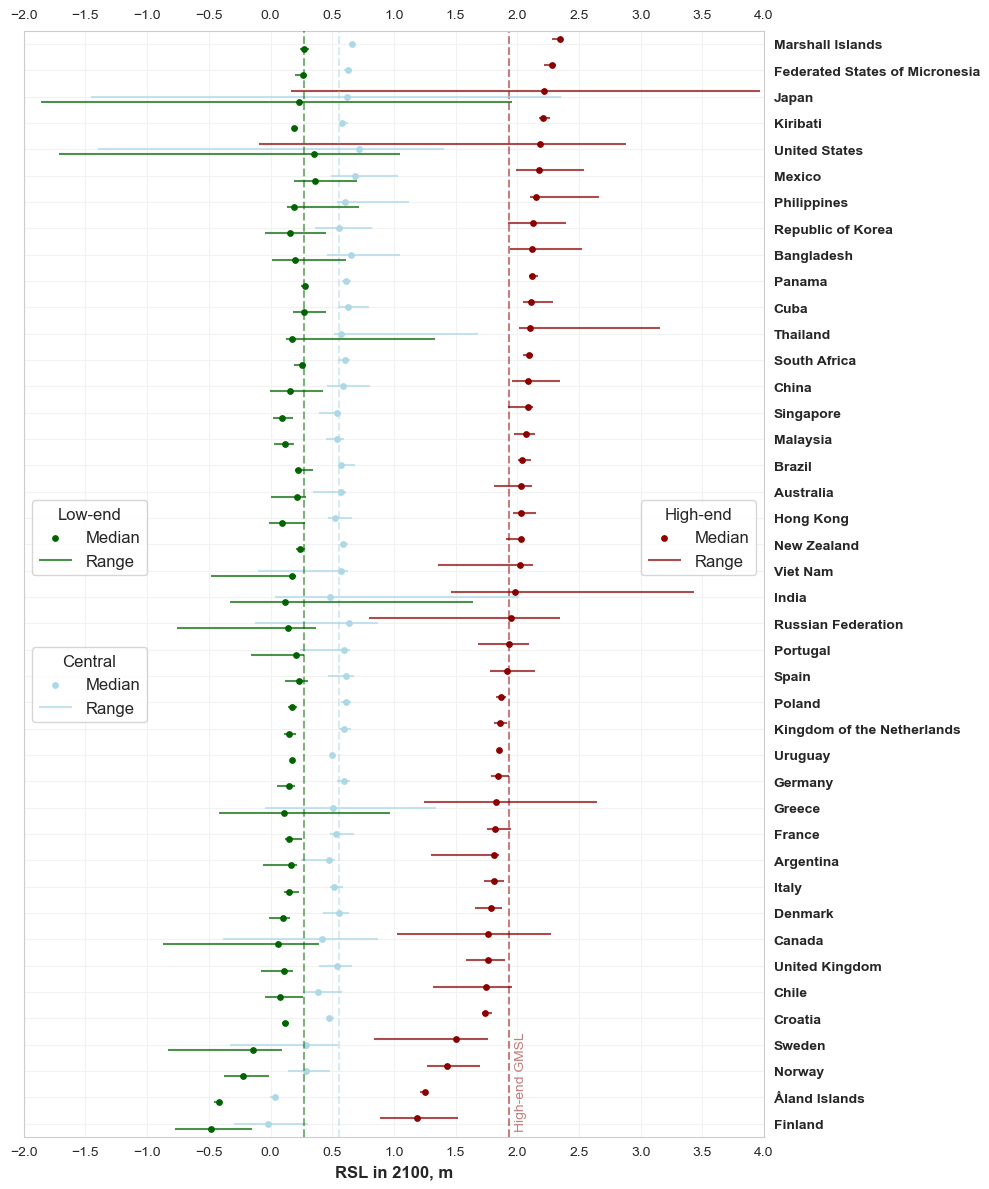

In [15]:
# Plot country-level median, min, and max of high-end, low-end, and central projections for 2100
fig, axs = d25a.fig_country_stats(rsl_novlm='rsl', min_count=4)
_ = d25a.name_save_fig(fig, fso='f')

Written s04.pdf (0.03 MB)
Written s04.png (0.31 MB)


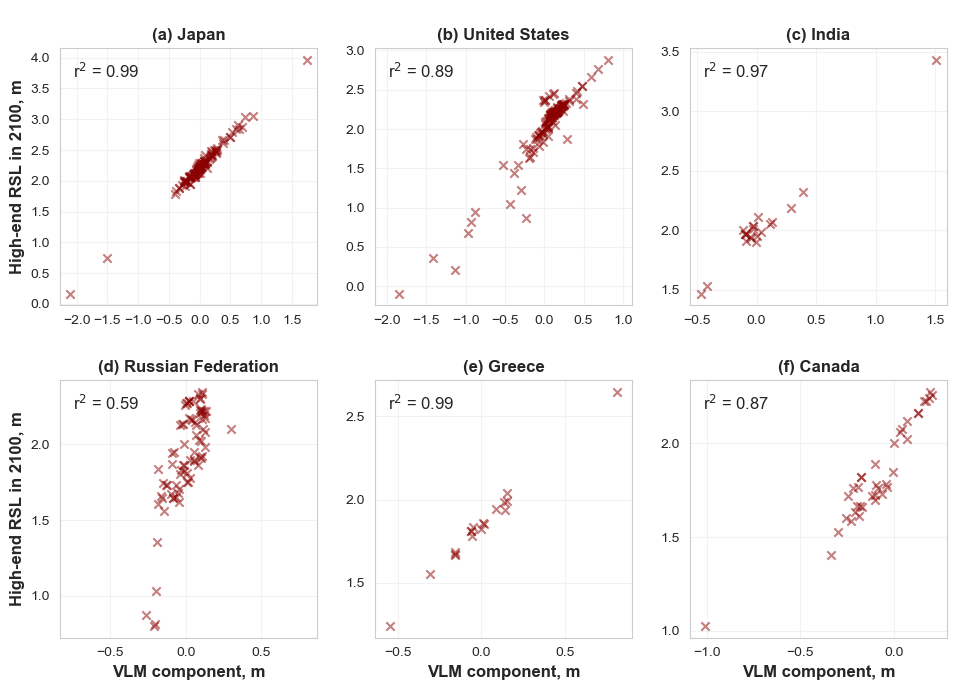

In [16]:
# Plot RSL vs VLM component of high-end projections for countries with the largest RSL ranges.
fig, axs = d25a.fig_rsl_vs_vlm()
_ = d25a.name_save_fig(fig, fso='s')

Written s05.pdf (0.02 MB)
Written s05.png (0.10 MB)


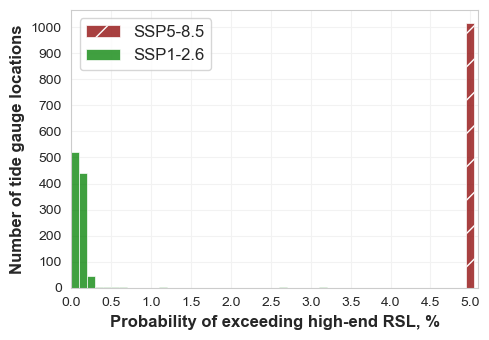

In [17]:
# Plot histogram showing probability of exceeding high-end projection at tide gauge locations
fig, ax = d25a.fig_p_exceed()
_ = d25a.name_save_fig(fig, fso='s')

In [18]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2025-01-24 13:45:44
End:       2025-01-24 13:46:05
Wall time: 21 s
